<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Nov 25 14:48:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.98       Driver Version: 526.98       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P5    19W /  N/A |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.0


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3070 Laptop GPU'

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(root="data",
                  train=True,
                  download=True,
                  transform=ToTensor(),
                  target_transform=None)

test_data = MNIST(root="data",
                 train=False,
                 download=True,
                 transform=ToTensor(),
                 target_transform=None)

print(f"Training data contains {len(train_data)} samples")
print(f"Test data contains {len(test_data)} samples")

Training data contains 60000 samples
Test data contains 10000 samples


In [5]:
# Display the class names of classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

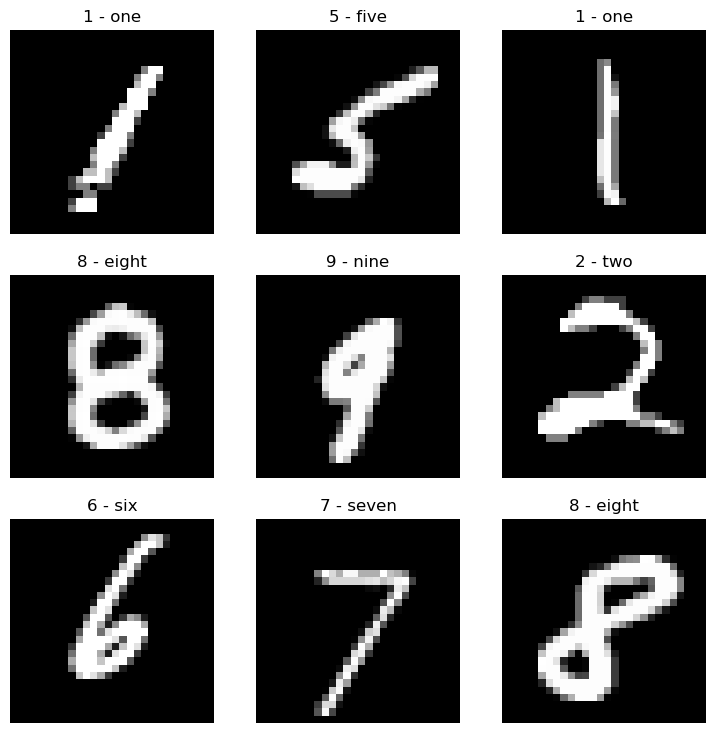

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
    random_idx = torch.randint(1, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                             batch_size=32,
                             shuffle=True)

test_dataloader = DataLoader(test_data,
                            batch_size=32)

print(f"Train DataLoader contains {len(train_dataloader)} batches of training data.")
print(f"Test DataLoader contains {len(test_dataloader)} batches of test data.")

Train DataLoader contains 1875 batches of training data.
Test DataLoader contains 313 batches of test data.


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
from torch import nn

class MNISTModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        
        self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU()
        )
        
        self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU())
        
        self.block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
        
        self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*3*3,
                 out_features=output_shape))
        
    def forward(self, x):
        x = self.block_1(x)
#         print(f"Output shape of block_1: {x.shape}")
        x = self.block_2(x)
#         print(f"Output shape of block_2: {x.shape}")
        x = self.block_2(x)
#         print(f"Output shape of block_3: {x.shape}")
        x = self.block_4(x)
#         print(f"Output shape of block_4: {x.shape}")
        logits = self.classifier(x)
#         print(f"Output shape of classifier: {logits.shape}")
        
        return logits

In [9]:
model = MNISTModel(input_shape=1,
             hidden_units=16,
             output_shape=10)

model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block_4): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=144, out_features=10, bias=True)
  )
)

In [10]:
# Creaate a dummy tensor and pass it throught our model
dummy_tensor = torch.randn(size=(1, 28, 28))

model(dummy_tensor.unsqueeze(0))

tensor([[-0.0836,  0.0047,  0.0960, -0.0538, -0.0162, -0.0136,  0.0089,  0.0686,
          0.0728,  0.0124]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [11]:
from tqdm.auto import tqdm

# Create a model and instantiate it
model_cpu = MNISTModel(input_shape=1,
                      hidden_units=16,
                      output_shape=10)

# Create a loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_cpu.parameters(), lr=2e-3)

# Create a training loop and testing loop
epochs = 3

for epoch in tqdm(range(epochs)):
    train_loss, test_loss = 0, 0
    model_cpu.train()
    for X,y in train_dataloader:
        y_pred = model_cpu(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model_cpu.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_cpu(X)
            loss_test = loss_fn(test_pred, y)
        
    # Print out what's happening
    print(f"Loss: {loss} | Test Loss: {loss_test}")
        

  0%|          | 0/3 [00:00<?, ?it/s]

Loss: 0.04270997643470764 | Test Loss: 0.00038970078458078206
Loss: 0.002106480998918414 | Test Loss: 0.0011534391669556499
Loss: 0.017818041145801544 | Test Loss: 0.0004180943360552192


## With GPU

In [12]:
from tqdm.auto import tqdm

# Create a model and instantiate it
model_gpu = MNISTModel(input_shape=1,
                      hidden_units=16,
                      output_shape=10).to(device)

# Create a loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_gpu.parameters(), lr=2e-3)

# Create a training loop and testing loop
epochs = 3

for epoch in tqdm(range(epochs)):
    model_gpu.train()
    for X,y in train_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model_gpu(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model_gpu.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_gpu(X)
            loss_test = loss_fn(test_pred, y)
        
    # Print out what's happening
    print(f"Loss: {loss} | Test Loss: {loss_test}")
        

  0%|          | 0/3 [00:00<?, ?it/s]

Loss: 0.09598054736852646 | Test Loss: 0.007283959072083235


### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
# Make predictions using our trained model and visualize them

# Make predictions 
model.eval()
with torch.inference_mode():
    for X,y in test_dataloader:
        logits = model_cpu(X)
        y_preds = logits.argmax(1)
y_preds[:10]

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(1, 3, 64, 64)
random_tensor

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?